In [1]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy.io
import behavior_plotting_fxns as pf

%load_ext autoreload
%autoreload 2

SERVER_PATH = '/Volumes/shohamy-locker/shohamy_from_labshare/rgerraty/hybrid_mri/'
LOCAL_PATH = 'data/'

data = pd.read_csv(LOCAL_PATH + 'hybrid_data.csv')

# raw behavioral files:
# import scipy.io
# mat = scipy.io.loadmat(SERVER_PATH + 'behavior/02_output/Performance_1.mat')
# mat['Performance'][0,0][2]# [0][0]

# Data attributes

Data columns:

- ---------------- from original .mat files (some just in [CardGame.txt](https://github.com/rgerraty/rl_flexibility/blob/master/CardGame.txt) -----------------
- 'Sub': subject number (1-35 excluding subs 1, 3, 11, and 35)
- 'Run': run number (1-5)
- 'Trial': trial number (1-300)
- 'OldT': is one of the items old (0 or 1)
- 'Delay': how many trials since the old item was previously seen
- 'LuckyDeck': which deck is lucky on that trial (1 or 2)
- 'ObjPP': the value of the object when previously seen
- 'OldObjLuckyDeck': is the old object in the lucky deck? 1 for NO and 0 for YES (??) 
- 'ObjDeckMatch': on old trials, does the old card value match the luck of the deck it's in? (0 for YES, 1 for no ??) 
- 'Outcome': what reward did they get
- 'Resp': which side of the screen they selected (decks swapped randomly)
- 'RT': response time (ms)
- 'DeckC': deck chosen (1 = blue, 2 = red)
- 'LuckyDeckC': was lucky deck chosen (0 or 1)
- 'OldObjC': was the old object chosen when seen again (0 or 1 or nan)
- 'RevT': number of trials that the current lucky deck has been lucky (1 at the reversal)
- 'OldDeckPP': most recent outcome from the deck currently with the old card
- 'OldDeck': which deck the old item appears in
- 'EncRevT': RevT of the encoding trial
- 'Enc_Pay1': PP (prior payment) of the encoding trial
- 'OptObj': given an old object, did subject make the optimal choice? (i.e., was old value > 0.5), 0 or 1
- 'PP': most recent outcome from previous trial (prior pay)
- 'StayResp': current trial chosen deck (DeckC) is same as the last

--------------------------------- from [hybrid_data_stan.R](https://github.com/rgerraty/hybrid_reinforcement_learning/blob/master/hybrid_data_stan.R)  ---------------------------------

- 'DeckUnC': which deck was unchosen (1 or 2)
- 'ObjPP_C': centered outcome (ObjPP-0.5) but only if the old object is chosen (OldObjC)
- 'ChooseRed': was DeckC red (0 or 1)
- 'LuckRed': 0.5 is red is lucky, -0.5 if blue is lucky
- 'OldRed': 0.5 if old is red deck, -0.5 if old is blue deck, 0 if no old
- 'OldValRed': old-weighted red value: OldRed * zero-centered ObjPP (ObjPP - 0.5), 0 if no old
- 'pre_post_rev': in first half or second half of chunk between reversals (-0.5 or 0.5, median split of RevT)
- 'pre_post_rev_enc': same as above but for the old object when it was first seen, median split of EncRevT

--------------------------------- from [extract_rl_pars.R](https://github.com/rgerraty/hybrid_reinforcement_learning/blob/master/extract_RL_pars.R)  ----------------------------------

- 'Q_chosen_norm': column norm of Q_chosen
- 'Q_unchosen_norm': column norm of Q_unchosen
- 'Q_diff_norm': difference of above
- 'PE_norm': column norm of PE
- 'Q_chosen': Q value of chosen deck
- 'Q_unchosen': Q value of unchosen deck
- 'Q_diff': difference of above Q values
- 'Q_red': Q value of red deck (same as above)
- 'Q_blue': Q value of blue deck (same as above)
- 'PE': prediction error
- 'Inc_lik': (log) likelihood of incremental model
- 'Ep_lik': (log) likelihood of episodic model
- 'Inc_lik_norm': column norm of above (within subject)
- 'Ep_lik_norm': column norm of above (within subject)
- 'Lik_rat': ratio of the two (Inc_lik_norm - Ep_lik_norm) - subtracted because they are log likelihoods
- 'Ep_lik_enc': episodic likelihood (of the retrieval trial) shifted onto the encoding trial
- 'Ep_lik_norm_enc': column norm of above
- 'encT': trials on which old objects were first seen
- 'Lik_rat_norm': column norm of Lik_rat (within subject)

In [ ]:
# def add_encoding_trial_to_beh(beh):
#     beh['encTrialNum'] = None
#     # Set encTrialNum for rows where 'OldT' == 1
#     for i, row in beh.iterrows():
#         if row['OldT'] == 1:
#             delay = row['Delay']
#             if i >= delay:
#                 beh.at[i, 'encTrialNum'] = beh.at[i - delay, 'Trial']
#     return beh
# beh = pd.read_csv('./data/hybrid_data.csv')
# beh = add_encoding_trial_to_beh(beh)
# beh.to_csv('./data/hybrid_data.csv',index=False)

# Behavioral analyses

### Overall simple

overall participant reward/performance (per run)

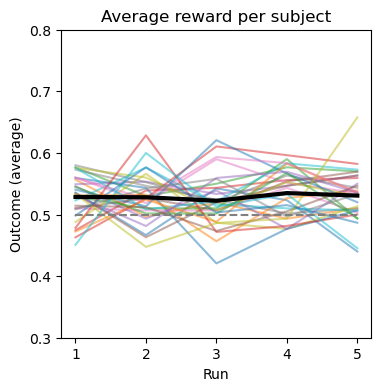

In [3]:
pf.overall_plot(data, x_var='Run', y_var='Outcome', grouping_var='Sub', mean=True,
                xticks=[1,2,3,4,5],ylim=(0.3,0.8), chance = 0.5, title ='Average reward per subject')

overall participant memory performance for each run

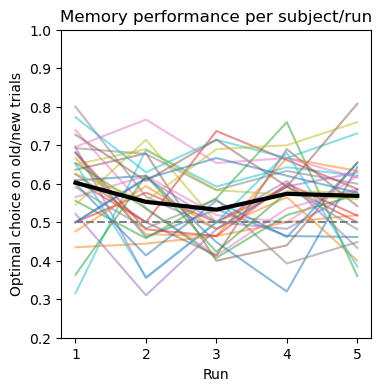

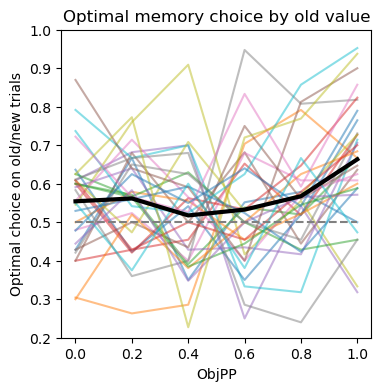

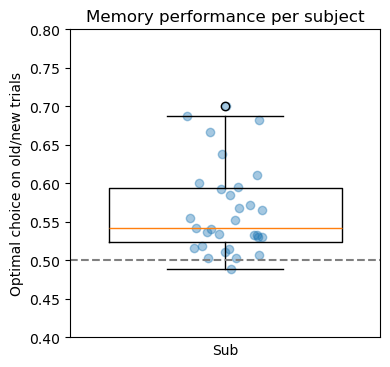

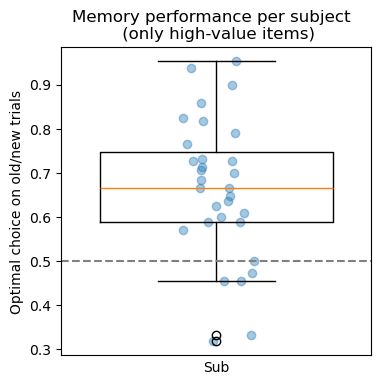

In [4]:
pf.overall_plot(data, x_var='Run', y_var='OptObj', grouping_var='Sub', mean=True,
                xticks=[1,2,3,4,5],ylim=(0.2,1), chance = 0.5, ylabel='Optimal choice on old/new trials',
                title ='Memory performance per subject/run')

pf.overall_plot(data, x_var='ObjPP', y_var='OptObj', grouping_var='Sub', mean=True,
                ylim=(0.2,1), chance = 0.5, ylabel='Optimal choice on old/new trials',
                title ='Optimal memory choice by old value')
pf.overall_boxplot(data, y_var='OptObj', grouping_var='Sub',ylim=(0.4,0.8), chance = 0.5, xlim=(0.9,1.1),
                   ylabel='Optimal choice on old/new trials', title ='Memory performance per subject')
pf.overall_boxplot(data[data.ObjPP==1], y_var='OptObj', grouping_var='Sub', chance = 0.5, xlim=(0.9,1.1),
                   ylabel='Optimal choice on old/new trials', title ='Memory performance per subject  \n (only high-value items)')

did participants show an overall bias to a DeckC or a Resp? 

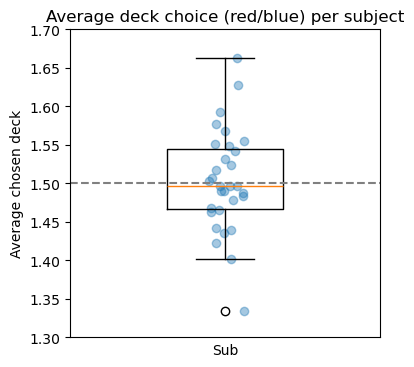

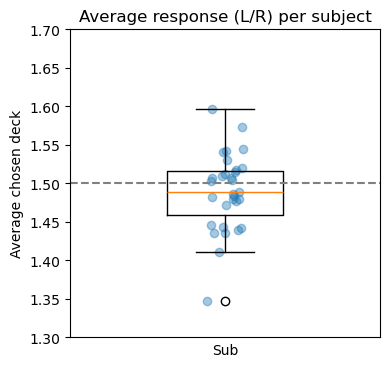

In [5]:
pf.overall_boxplot(data, y_var='DeckC', grouping_var='Sub', chance = 1.5, ylabel='Average chosen deck',
                   ylim=(1.3,1.7),xlim=(0.8,1.2),title ='Average deck choice (red/blue) per subject')
## BY RUN:
# pf.overall_plot(data, x_var='Run', y_var='DeckC', grouping_var='Sub', mean=True,
#                 xticks=[1,2,3,4,5], chance = 1.5, ylabel='Average chosen deck',ylim=(1,2),yticks=(1,1.5,2),
#                 title ='Average deck choice (red/blue) per subject')

pf.overall_boxplot(data, y_var='Resp', grouping_var='Sub', chance = 1.5, ylabel='Average chosen deck',
                   ylim=(1.3,1.7),xlim=(0.8,1.2),title ='Average response (L/R) per subject')
## BY RUN:
# pf.overall_plot(data, x_var='Run', y_var='Resp', grouping_var='Sub', mean=True,
#                 xticks=[1,2,3,4,5], chance = 1.5, ylabel='Average chosen deck',ylim=(1,2),yticks=(1,1.5,2),
#                 title ='Average response (L/R) per subject')

did last trial's payment affect this trial's deck selection?

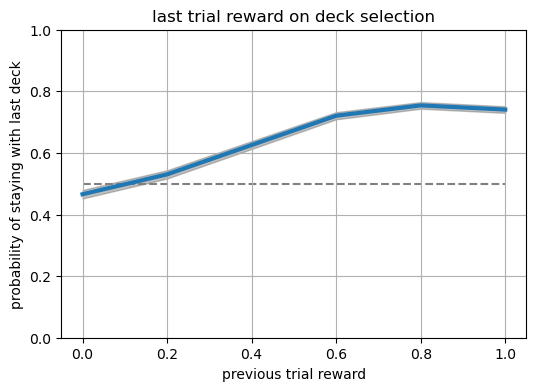

In [5]:
pf.simple_plot(data, x_var='PP', y_var = 'StayResp', ylim=(0,1), chance=0.5,
             xlabel='previous trial reward', ylabel='probability of staying with last deck',
             title='last trial reward on deck selection')

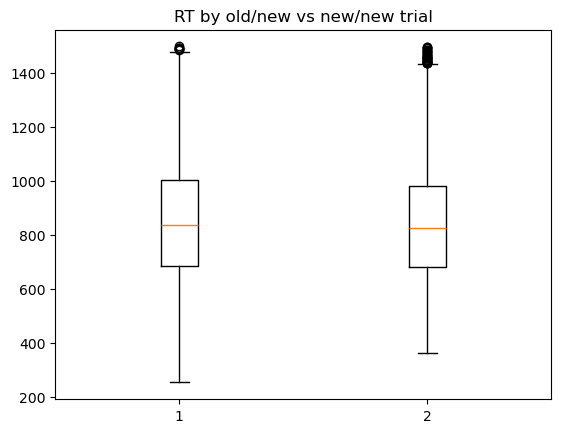

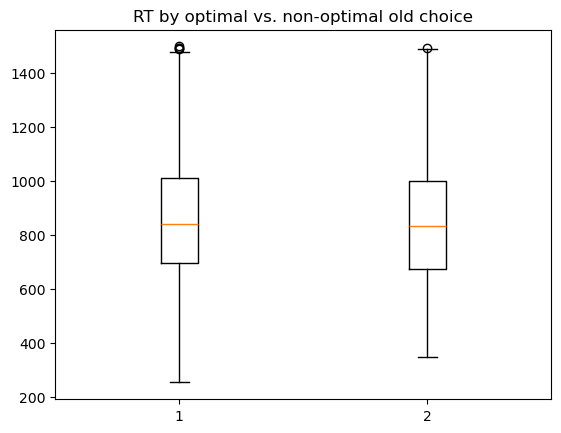

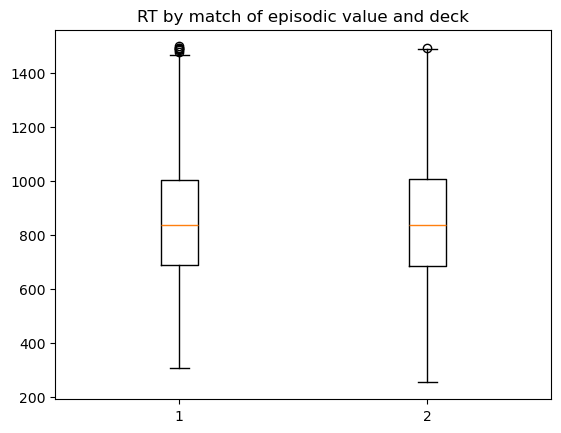

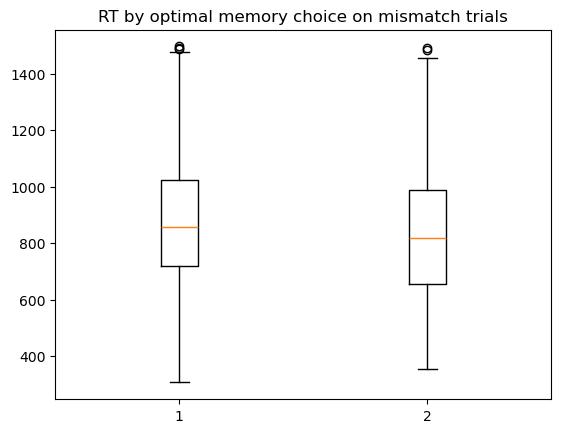

In [ ]:
# RT differences between key conditions?
plt.boxplot([ data[(data.OldT==1)&(~pd.isna(data.RT))].RT, data[(data.OldT==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by old/new vs new/new trial')
plt.show()

plt.boxplot([ data[(data.OptObj==1)&(~pd.isna(data.RT))].RT, data[(data.OptObj==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by optimal vs. non-optimal old choice')
plt.show()

plt.boxplot([ data[(data.ObjDeckMatch==1)&(~pd.isna(data.RT))].RT, data[(data.ObjDeckMatch==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by match of episodic value and deck')
plt.show()

plt.boxplot([ data[(data.OptObj==1)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT, data[(data.OptObj==0)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT ])
plt.title('RT by optimal memory choice on mismatch trials')
plt.show()

# plt.boxplot([ data[(data.OptObj==1)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT, data[(data.OptObj==0)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT ])
plt.title('RT by optimal memory choice on mismatch trials')
plt.show()

### Episodic / incremental

In [ ]:
from pymer4.models import Lmer

data['Q_olddeck'] = data.apply(
    lambda row: row['Q_chosen'] if row['OldObjC'] == 1 else row['Q_unchosen'],
    axis=1
)
# # choice model
# choice_model = Lmer(
#     formula='OldObjC ~ ObjPP + Q_olddeck + (1|Sub)',
#     data=data,
#     family='binomial'
# )
choice_model = Lmer(
    formula='OldObjC ~ ObjPP * EncRevT + (ObjPP*EncRevT|Sub)',
    data=data,
    family='binomial'
)
choice_model.fit()
print(choice_model.summary())

# data['logRT'] = np.log(data.RT)
# # rt model
# rt_model = Lmer(
#     formula='logRT ~ Q_diff + ObjPP + Q_diff:ObjPP + (1|Sub)',
#     data=data
# )
# rt_model.fit()
# print(rt_model.summary())

boundary (singular) fit: see help('isSingular') 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: OldObjC~ObjPP*EncRevT+(ObjPP*EncRevT|Sub)

Family: binomial	 Inference: parametric

Number of observations: 9239	 Groups: {'Sub': 31.0}

Log-likelihood: -2744.568 	 AIC: 5517.136

Random effects:

              Name    Var    Std
Sub    (Intercept)  0.000  0.000
Sub          ObjPP  0.317  0.563
Sub        EncRevT  0.001  0.033
Sub  ObjPP:EncRevT  0.002  0.048

             IV1            IV2      Corr
Sub  (Intercept)          ObjPP          
Sub  (Intercept)        EncRevT          
Sub  (Intercept)  ObjPP:EncRevT          
Sub        ObjPP        EncRevT  0.300258
Sub        ObjPP  ObjPP:E

/Users/chrisiyer/miniconda3/envs/hbi/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/chrisiyer/miniconda3/envs/hbi/lib/python3.9/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


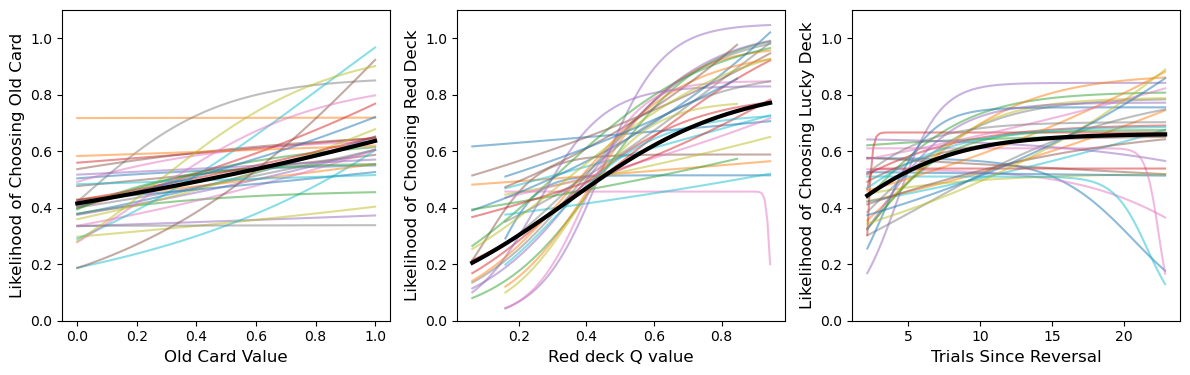

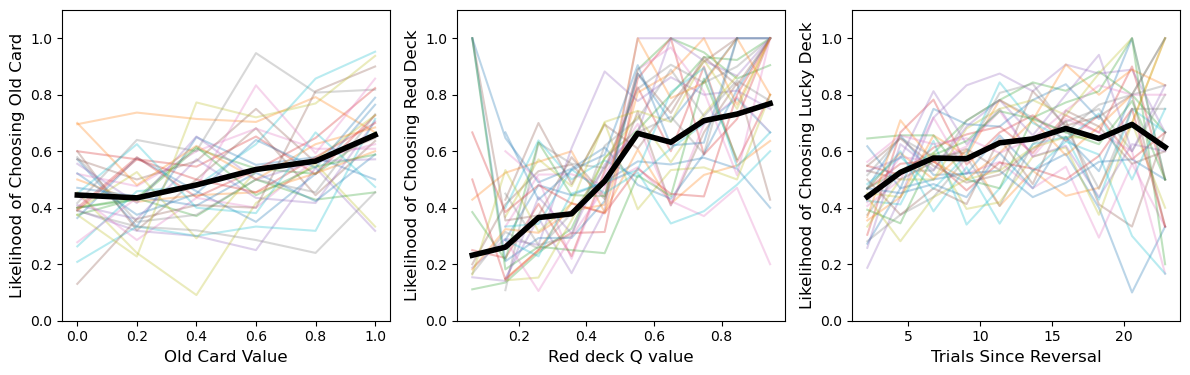

In [3]:
pf.plot_separate_subjects(data, x_cols = ['ObjPP','Q_red','RevT'], y_cols = ['OldObjC','ChooseRed','LuckyDeckC'],
                       x_texts = ["Old Card Value",'Red deck Q value','Trials Since Reversal'],
                       y_texts = ["Likelihood of Choosing Old Card", 'Likelihood of Choosing Red Deck', 'Likelihood of Choosing Lucky Deck'],
                       logistic_fit=True)
pf.plot_separate_subjects(data, x_cols = ['ObjPP','Q_red','RevT'], y_cols = ['OldObjC','ChooseRed','LuckyDeckC'],
                       x_texts = ["Old Card Value",'Red deck Q value','Trials Since Reversal'],
                       y_texts = ["Likelihood of Choosing Old Card", 'Likelihood of Choosing Red Deck', 'Likelihood of Choosing Lucky Deck'],
                       logistic_fit=False)

do participants use incremental information? 

/Users/chrisiyer/_Current/lab/code/hybrid_rl/fmri_analysis/behavior_plotting_fxns.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(x_var)[y_var].agg(['count','mean','sem'])
/Users/chrisiyer/_Current/lab/code/hybrid_rl/fmri_analysis/behavior_plotting_fxns.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data2 = data.groupby(x_var)[y2].mean()


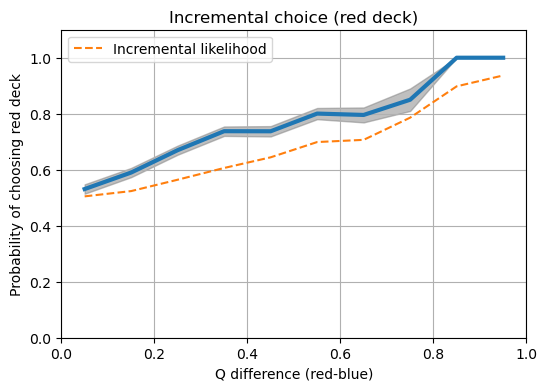

/Users/chrisiyer/_Current/lab/code/hybrid_rl/fmri_analysis/behavior_plotting_fxns.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(x_var)[y_var].agg(['count','mean','sem'])
/Users/chrisiyer/_Current/lab/code/hybrid_rl/fmri_analysis/behavior_plotting_fxns.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data2 = data.groupby(x_var)[y2].mean()


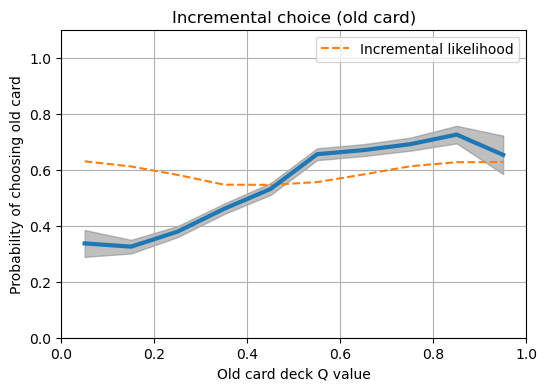

In [7]:
#   red deck q value vs likelihood of choosing red deck
data['Q_diff_rb'] = data['Q_red'] - data['Q_blue']
pf.simple_plot(data, x_var='Q_diff_rb', y_var='ChooseRed', bin=True, bins = np.linspace(0,1,11),
               xlabel='Q difference (red-blue)', ylabel='Probability of choosing red deck',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True, ylim=(0,1.1), xticks=np.arange(6)/5,
               title='Incremental choice (red deck)')

#   old card deck q-value vs. likelihood of choosing deck
data["Q_old"] = np.select(
    [data["OldDeck"] == 2, data["OldDeck"] == 1],  
    [data["Q_red"], data["Q_blue"]],  
    default=np.nan  
)
pf.simple_plot(data, x_var='Q_old', y_var='OldObjC', bin=True, bins = np.linspace(0,1,11),
               xlabel='Old card deck Q value', ylabel='Probability of choosing old card',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True, ylim=(0,1.1), xticks=np.arange(6)/5,
               title='Incremental choice (old card)')

do participants use episodic information? old card value vs. likelihood of choosing it

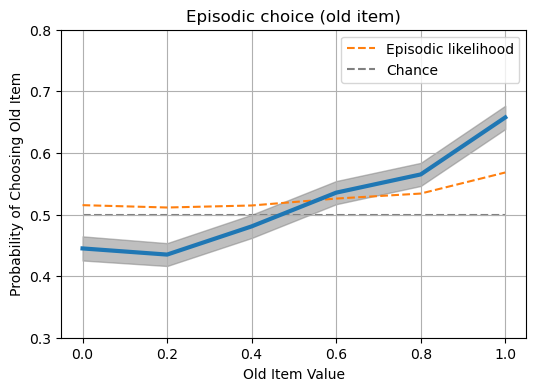

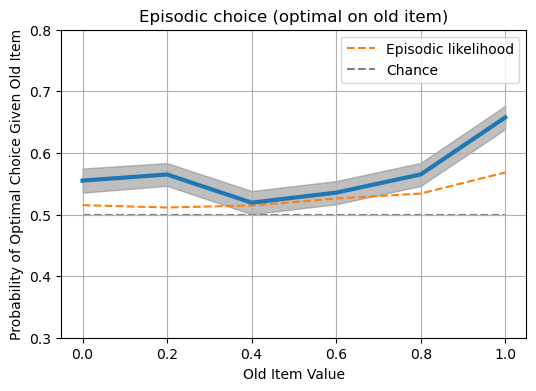

In [8]:
# old value vs old choice
pf.simple_plot(data, x_var='ObjPP', y_var='OldObjC', ylim=(0.3,0.8), chance=0.5,
               xlabel='Old Item Value', ylabel='Probability of Choosing Old Item',
               y2='Ep_lik', y2_label = 'Episodic likelihood', legend=True,
               title='Episodic choice (old item)')
# old value vs. optimal choice
pf.simple_plot(data, x_var='ObjPP', y_var='OptObj', ylim=(0.3,0.8),chance=0.5,
               xlabel='Old Item Value', ylabel='Probability of Optimal Choice Given Old Item',
               y2='Ep_lik', y2_label = 'Episodic likelihood', legend=True,  
               title='Episodic choice (optimal on old item)')

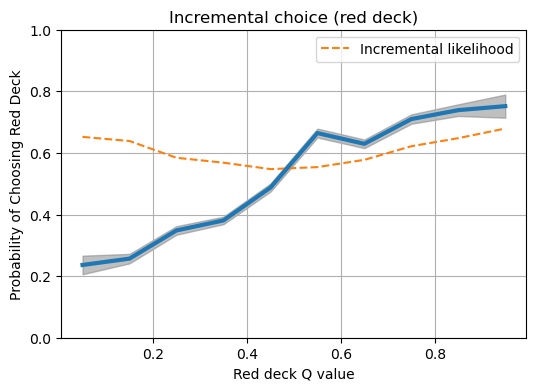

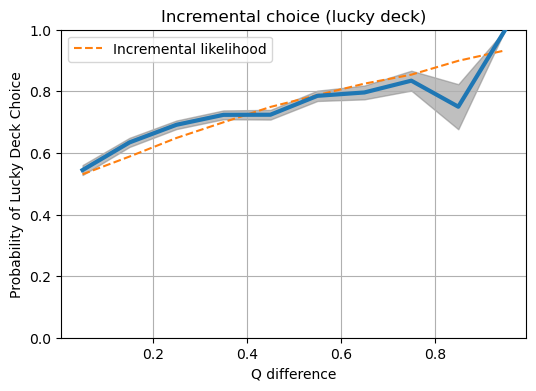

In [9]:
# do participants use incremental information? 
#   red deck q value vs likelihood of choosing red deck

pf.simple_plot(data, x_var='Q_red', y_var='ChooseRed', bin=True, bins = np.linspace(0,1,11),
               ylim=(0,1),
               xlabel='Red deck Q value', ylabel='Probability of Choosing Red Deck',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True,
               title='Incremental choice (red deck)')
pf.simple_plot(data, x_var='Q_diff', y_var='LuckyDeckC', bin=True, bins = np.linspace(0,1,11),
               ylim=(0,1),
               xlabel='Q difference', ylabel='Probability of Lucky Deck Choice',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True,
               title='Incremental choice (lucky deck)')

#   old card deck q-value vs. likelihood of choosing deck

### Encoding effects

memory success by delay

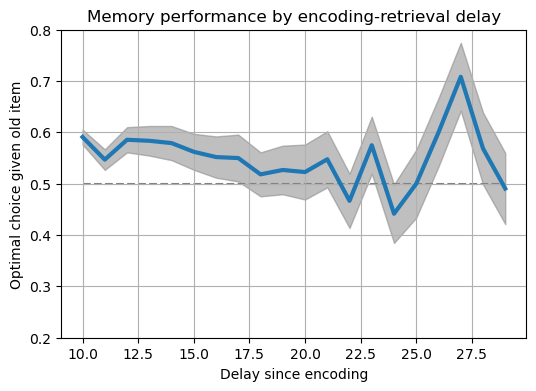

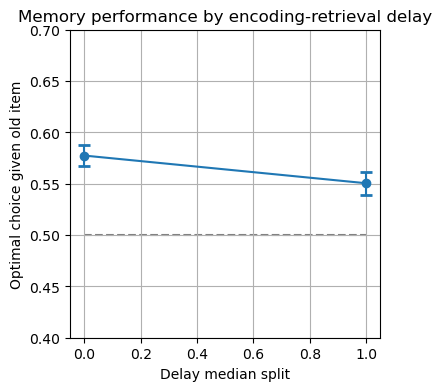

In [8]:
pf.simple_plot(data, x_var='Delay',y_var='OptObj',xlabel='Delay since encoding', ylabel='Optimal choice given old item',
               ylim=(0.2,0.8), chance=0.5, title='Memory performance by encoding-retrieval delay')

# median split
data['Delay_bool'] = data.Delay > data.Delay.median()
pf.simple_plot_pair(data, x_var='Delay_bool',y_var='OptObj',xlabel='Delay median split', ylabel='Optimal choice given old item',
               ylim=(0.4,0.7), chance=0.5, title='Memory performance by encoding-retrieval delay')

memory success by encoding attributes

In [ ]:
new_columns = [
    "Outcome_enc", "Outcome_enc_just1", "Outcome_enc_unsigned", "Outcome_enc_sign",
    "Q_chosen_enc", "Q_chosen_enc_unsigned", "Q_chosen_enc_sign",
    "PE_enc", "PE_enc_unsigned", "PE_enc_sign",
    "PE_prevtrial_enc", "PE_prevtrial_enc_unsigned", "PE_prevtrial_enc_sign",
    "RT_enc","RevT_enc_centered"
]
for col in new_columns:
    data[col] = np.nan

for idx,row in data[data.OldT==1].iterrows():
    enc_idx = data[(data['Trial'] == row['encTrialNum']) & (data['Sub'] == row['Sub'])].index
    if len(enc_idx) == 0:
        continue
    enc_idx = enc_idx[0]

    data.at[idx, "Outcome_enc"] = data.at[enc_idx, "Outcome"]
    data.at[idx, "Outcome_enc_just1"] = float(data.at[enc_idx, "Outcome"] == 1)
    data.at[idx, "Outcome_enc_unsigned"] = abs(data.at[enc_idx, "Outcome"] - 0.5)
    data.at[idx, "Outcome_enc_sign"] = np.sign(data.at[enc_idx, "Outcome"] - 0.5)

    data.at[idx, "Q_chosen_enc"] = data.at[enc_idx, "Q_chosen"]
    data.at[idx, "Q_chosen_enc_unsigned"] = abs(data.at[enc_idx, "Q_chosen"] - 0.5)
    data.at[idx, "Q_chosen_enc_sign"] = np.sign(data.at[enc_idx, "Q_chosen"] - 0.5)

    data.at[idx, "PE_enc"] = data.at[enc_idx, "PE"]
    data.at[idx, "PE_enc_unsigned"] = abs(data.at[enc_idx, "PE"])
    data.at[idx, "PE_enc_sign"] = np.sign(data.at[enc_idx, "PE"])

    if enc_idx != 0:
        data.at[idx, "PE_prevtrial_enc"] = data.at[enc_idx - 1, "PE"]
        data.at[idx, "PE_prevtrial_enc_unsigned"] = abs(data.at[enc_idx - 1, "PE"] - 0.5)
        data.at[idx, "PE_prevtrial_enc_sign"] = np.sign(data.at[enc_idx - 1, "PE"] - 0.5)

    data.at[idx, "RT_enc"] = np.log(data.at[enc_idx, "RT"])
    data.at[idx, "RevT_enc_centered"] = row.EncRevT - 10

In [146]:
from pymer4.models import Lmer
# data['Outcome_enc_interaction'] = data.Outcome_enc_unsigned * data.Outcome_enc_sign
# data['Q_chosen_enc_interaction'] = data.Q_chosen_enc_unsigned * data.Q_chosen_enc_sign
# data['PE_enc_interaction'] = data.PE_enc_unsigned * data.PE_enc_sign
# data['PE_prevtrial_enc_interaction'] = data.PE_prevtrial_enc_unsigned * data.PE_prevtrial_enc_sign

# model = Lmer(
#     "OptObj ~  Outcome_enc_unsigned + Outcome_enc_sign + Outcome_enc_interaction + " 
#     " Q_chosen_enc_unsigned + Q_chosen_enc_sign + Q_chosen_enc_interaction + " 
#     "PE_enc_unsigned + PE_enc_sign + PE_enc_interaction + PE_prevtrial_enc_unsigned + PE_prevtrial_enc_sign + PE_prevtrial_enc_interaction + " 
#     "RevT_enc_centered + (1 | Sub)",
#     data=data[data.OldT==1]
# )

# model = Lmer(
#     "OptObj ~  Outcome_enc_unsigned + Outcome_enc_interaction + "
#     "Q_chosen_enc_unsigned + Q_chosen_enc_interaction + " 
#     "PE_enc_unsigned + PE_enc_interaction + PE_prevtrial_enc_unsigned + PE_prevtrial_enc_interaction + " 
#     "RevT_enc_centered + (1 | Sub)",
#     data=data[data.OldT==1]
# )

model = Lmer(
    "OptObj ~  Outcome_enc + Outcome_enc_just1 + Q_chosen_enc + PE_enc + PE_prevtrial_enc + RevT_enc_centered + (1 | Sub)",
    data=data[data.OldT==1]
)
model.fit()
print(model.summary())


**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by REML [’lmerMod’]
Formula: OptObj~Outcome_enc+Outcome_enc_just1+Q_chosen_enc+PE_enc+PE_prevtrial_enc+RevT_enc_centered+(1|Sub)

Family: gaussian	 Inference: parametric

Number of observations: 4092	 Groups: {'Sub': 31.0}

Log-likelihood: -2930.658 	 AIC: 5879.317

Random effects:

                 Name    Var    Std
Sub       (Intercept)  0.002  0.040
Residual               0.242  0.492

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: OptObj~Outcome_enc+Outcome_enc_just1+Q_chosen_enc+PE_enc+PE_prevtrial_enc+RevT_enc_centered+(1|Sub)

Family: gaussian	 Inference: parametric

Number of observations: 4092	 Groups: {'Sub': 31

/Users/chrisiyer/miniconda3/envs/hbi/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


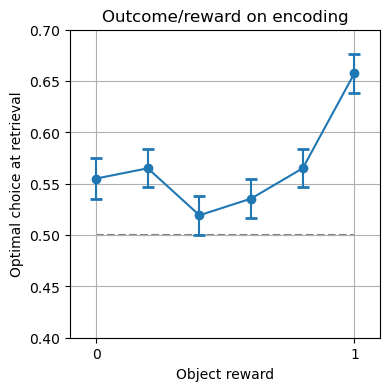

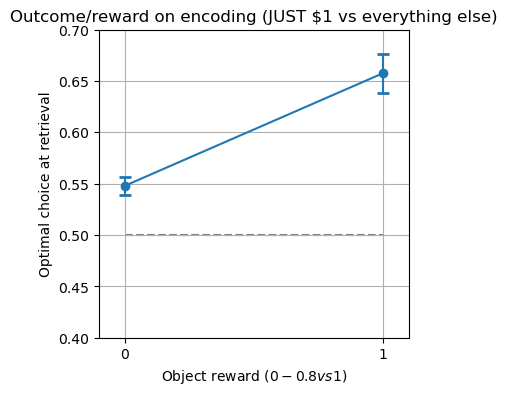

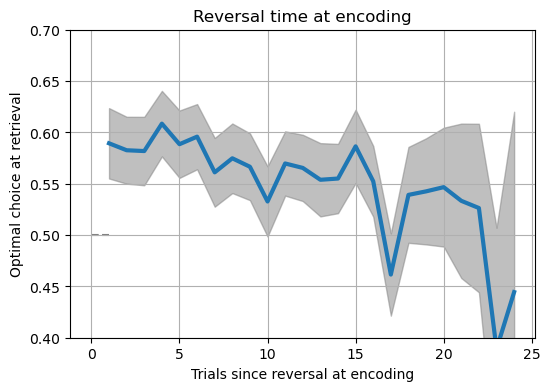

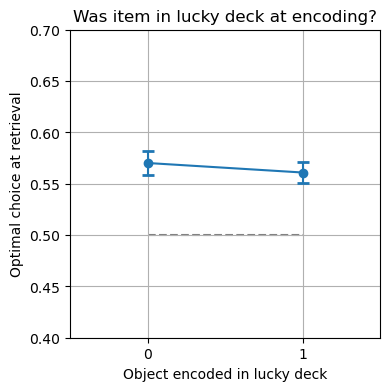

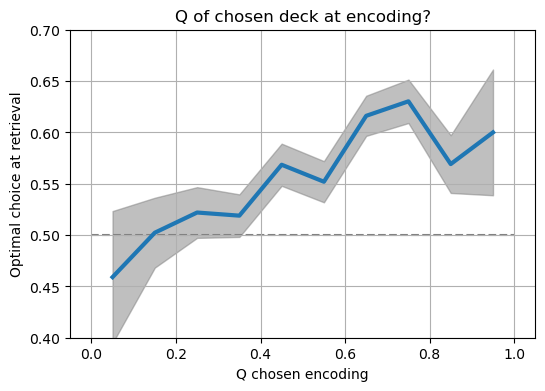

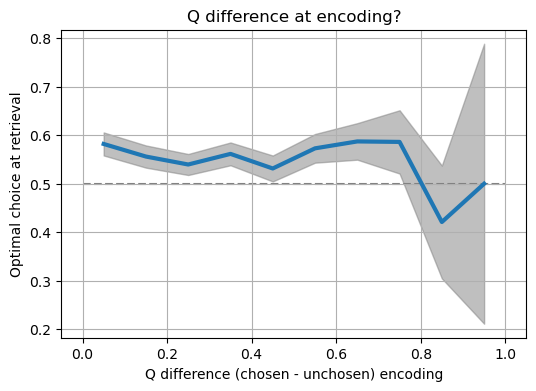

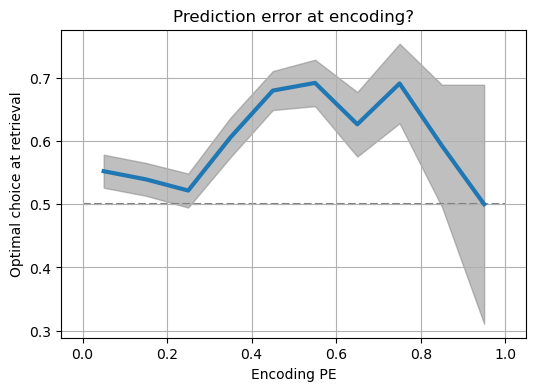

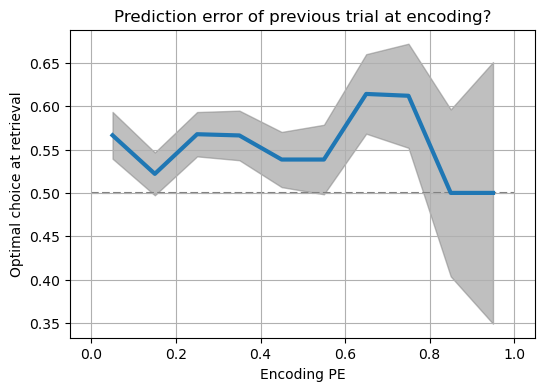

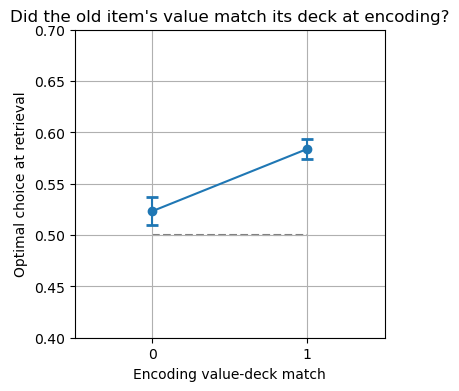

In [86]:
# reward encoding
pf.simple_plot_pair(data, x_var='Outcome_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Object reward', 
                  ylabel='Optimal choice at retrieval',
                  title='Outcome/reward on encoding',
                  xlim=(-0.1,1.1), xticks=(0,1),ylim=(0.4,0.7))

pf.simple_plot_pair(data, x_var='Outcome_just1_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Object reward ($0-0.8 vs $1)', 
                  ylabel='Optimal choice at retrieval',
                  title='Outcome/reward on encoding (JUST $1 vs everything else)',
                  xlim=(-0.1,1.1), xticks=(0,1),ylim=(0.4,0.7))

# revt
pf.simple_plot(data, x_var='EncRevT',y_var='OptObj', chance=0.5,
                  xlabel = 'Trials since reversal at encoding', 
                  ylabel='Optimal choice at retrieval',
                  title='Reversal time at encoding', ylim=(0.4,0.7))

# # was it in the first half of encoding revT
# pf.simple_plot_pair(data, x_var='pre_post_rev_enc',y_var='OptObj', chance=0.5,
#                   xlabel = 'Object in first or second half of reversal block', 
#                   ylabel='Optimal choice at retrieval',
#                   title='Was item encoded in first or second half of reversal block?',
#                   xlim=(-1,1), xticks=(-0.5,0.5),ylim=(0.4,0.7))

# was it in the lucky deck at time of encoding
pf.simple_plot_pair(data, x_var='OldObjLuckyDeckEnc',y_var='OptObj', chance=0.5,
                  xlabel = 'Object encoded in lucky deck', 
                  ylabel='Optimal choice at retrieval',
                  title='Was item in lucky deck at encoding?',
                  xlim=(-0.5,1.5), xticks=(0,1),ylim=(0.4,0.7))

# q chosen at time of encoding
pf.simple_plot(data, x_var='Q_chosen',y_var='OptObj', chance=0.5,
                  xlabel = 'Q chosen encoding', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Q of chosen deck at encoding?',
                  ylim=(0.4,0.7))

# q diff at time of encoding
pf.simple_plot(data, x_var='Q_diff_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Q difference (chosen - unchosen) encoding', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Q difference at encoding?',)

# PE at time of encoding
pf.simple_plot(data, x_var='PE_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Encoding PE', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Prediction error at encoding?',)

# PE of previous trial at time of encoding
pf.simple_plot(data, x_var='PE_prevtrial_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Encoding PE', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Prediction error of previous trial at encoding?',)

# did its value match its deck?
pf.simple_plot_pair(data, x_var='ValueDeckMatchEnc',y_var='OptObj', chance=0.5,
                  xlabel = 'Encoding value-deck match', 
                  ylabel='Optimal choice at retrieval',
                  title='Did the old item\'s value match its deck at encoding?',
                  xlim=(-0.5,1.5), xticks=(0,1),ylim=(0.4,0.7))

### Reversal effects

within the first few trials of a reversal, do old trials help people infer reversal? 
- THEY SHOUDLN'T! If old value and deck value are decorrelated, then old trials should be uninformative about the lucky deck

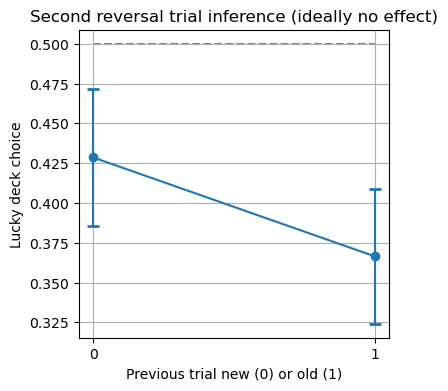

In [139]:
# new_after_new = {1:[],2:[],3:[],4:[],5:[]}
# new_after_old= {1:[],2:[],3:[],4:[],5:[]}
second_trial_data = pd.DataFrame(columns=['prev_OldT', 'LuckyDeckC'])
for i in range(len(data)):
    if (data.RevT[i] == 2) & (data.OldT[i] == 0): # new trial on second of a reversal
        second_trial_data.loc[len(second_trial_data)] = [data.OldT[i-1], data.LuckyDeckC[i]]

pf.simple_plot_pair(data=second_trial_data, x_var='prev_OldT',y_var='LuckyDeckC',
                    xlabel='Previous trial new (0) or old (1)', ylabel='Lucky deck choice',
                    chance = 0.5, xticks=((0,1)), title='Second reversal trial inference (ideally no effect)')

effect of reversal on overall performance, lucky deck choice, and on old card choice (+each run)


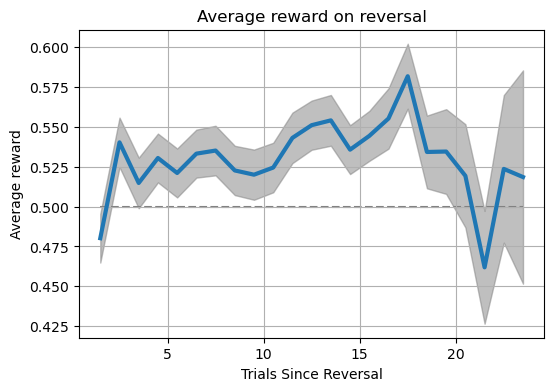

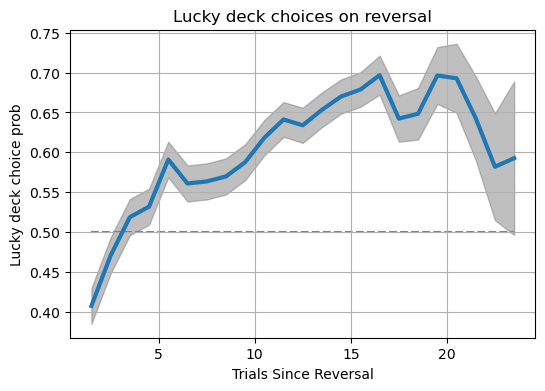

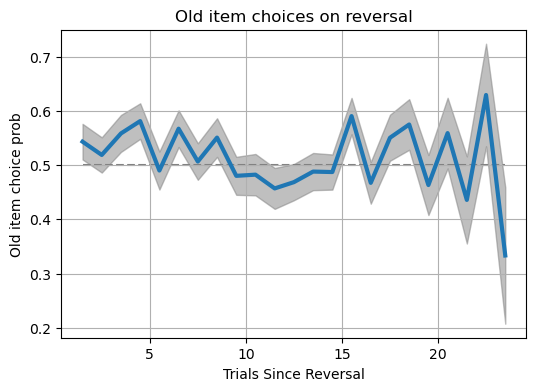

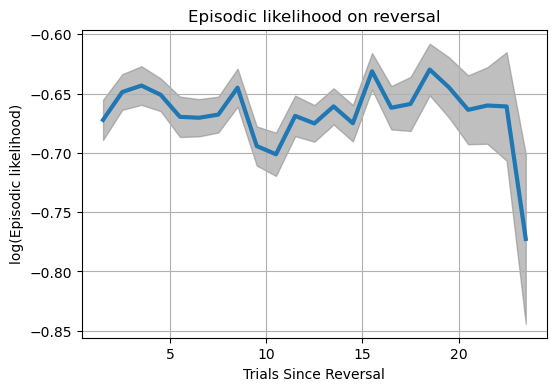

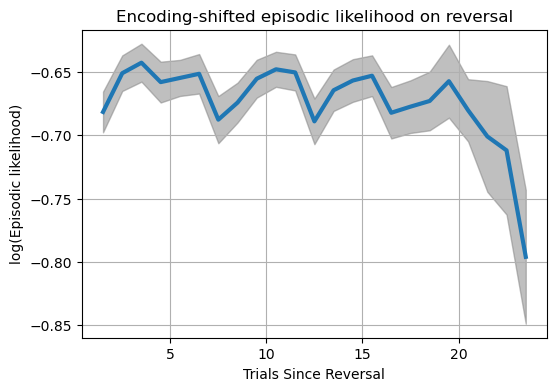

In [4]:
# revT against overall performance
pf.simple_plot(data, x_var = 'RevT', y_var = 'Outcome', chance=0.5,
               xlabel = 'Trials Since Reversal', ylabel='Average reward',
               title = 'Average reward on reversal', bins = data.RevT.unique())

# revT against lucky deck choices
pf.simple_plot(data, x_var = 'RevT', y_var = 'LuckyDeckC',  chance=0.5,
               xlabel = 'Trials Since Reversal', ylabel='Lucky deck choice prob',
               title = 'Lucky deck choices on reversal', bins = data.RevT.unique())

# revT against old card choice
pf.simple_plot(data, x_var = 'RevT', y_var = 'OldObjC',  chance=0.5,
               xlabel = 'Trials Since Reversal', ylabel='Old item choice prob',
               title = 'Old item choices on reversal', bins = data.RevT.unique())

# revT against Episodic likelihood 
pf.simple_plot(data, x_var = 'RevT', y_var = 'Ep_lik',  
               xlabel = 'Trials Since Reversal', ylabel='log(Episodic likelihood)',
               title = 'Episodic likelihood on reversal', bins = data.RevT.unique())

# revT against encoding-shifted Episodic likelihood 
pf.simple_plot(data, x_var = 'RevT', y_var = 'Ep_lik_enc',  
               xlabel = 'Trials Since Reversal', ylabel='log(Episodic likelihood)',
               title = 'Encoding-shifted episodic likelihood on reversal', bins = data.RevT.unique())

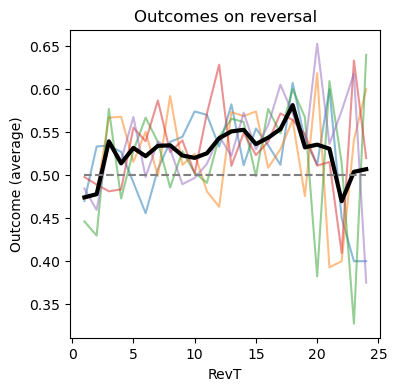

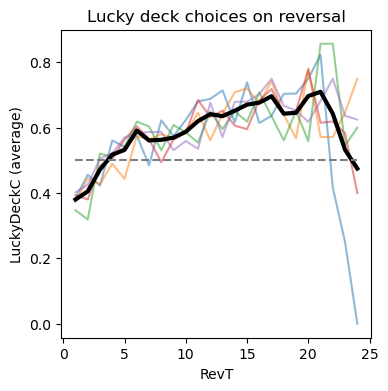

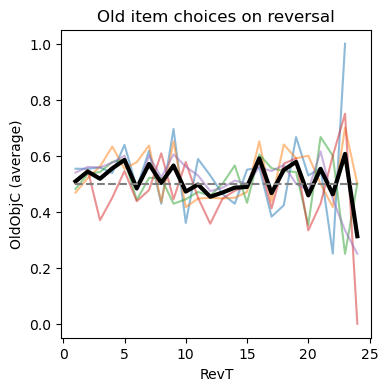

In [141]:
# same but separating runs
# revT against overall performance
pf.overall_plot(data, x_var = 'RevT', y_var = 'Outcome', grouping_var='Run', chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Average reward',
               title = 'Outcomes on reversal', bins = data.RevT.unique()) # , legend=True)
# revT against lucky deck choices
pf.overall_plot(data, x_var = 'RevT', y_var = 'LuckyDeckC', grouping_var='Run',  chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Lucky deck choice prob',
               title = 'Lucky deck choices on reversal', bins = data.RevT.unique())# , legend=True)

# revT against old card choice
pf.overall_plot(data, x_var = 'RevT', y_var = 'OldObjC',  grouping_var='Run', chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Old item choice prob',
               title = 'Old item choices on reversal', bins = data.RevT.unique())# , legend=True)

### Lingering memory modes

does the previous trial's memory performance bias the current trial?


- OBJECT USE: limit to just *consecutive* pairs of old/new trials
    - separate by memory performance (optimal choice) on first trial of the pair
    - plot value of old object vs. old choice for second trial of the pair 
- DECK USE: 
    - preceding deck outcome on the x, compare successful old/new last trial vs. wrong old/new last trial to prob of staying with deck 
- same as above, but instead of comparing previous trial correct old/new vs. incorrect old new, we will compare previous trial correct old/new vs. prev trial new/new

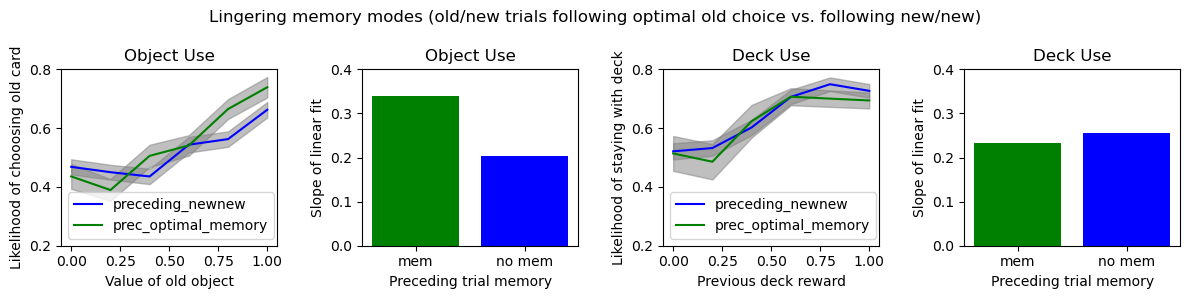

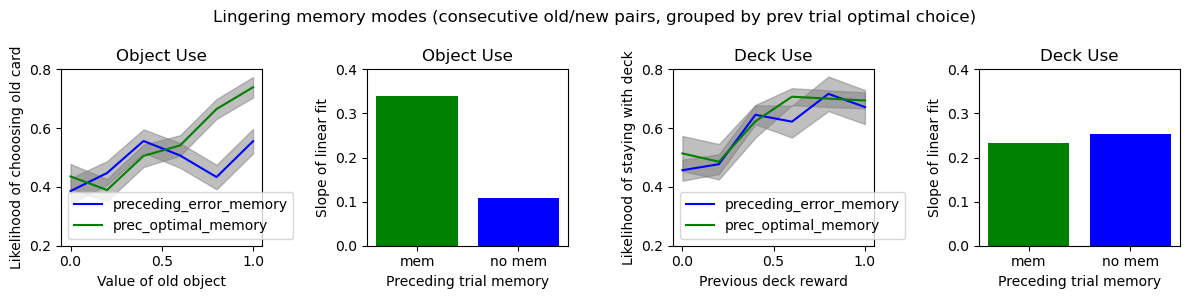

In [555]:
pf.plot_lingering_modes(data, oldnew_vs_newnew=True,
                        title = 'Lingering memory modes (old/new trials following optimal old choice vs. following new/new)')

pf.plot_lingering_modes(data, oldnew_vs_newnew=False,
                        title = 'Lingering memory modes (consecutive old/new pairs, grouped by prev trial optimal choice)')


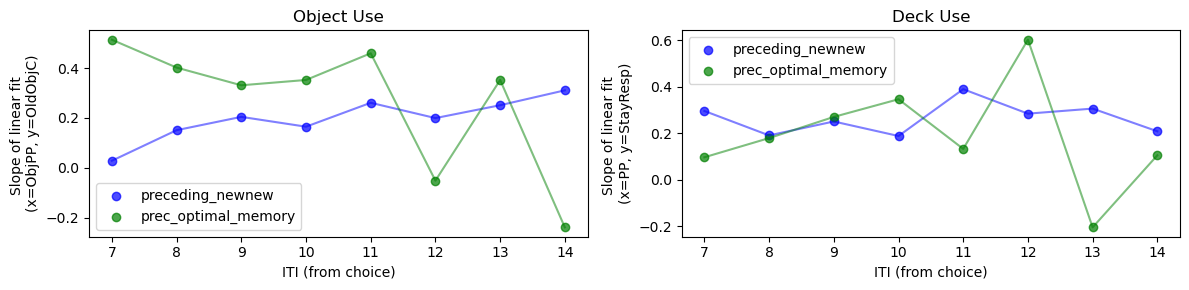

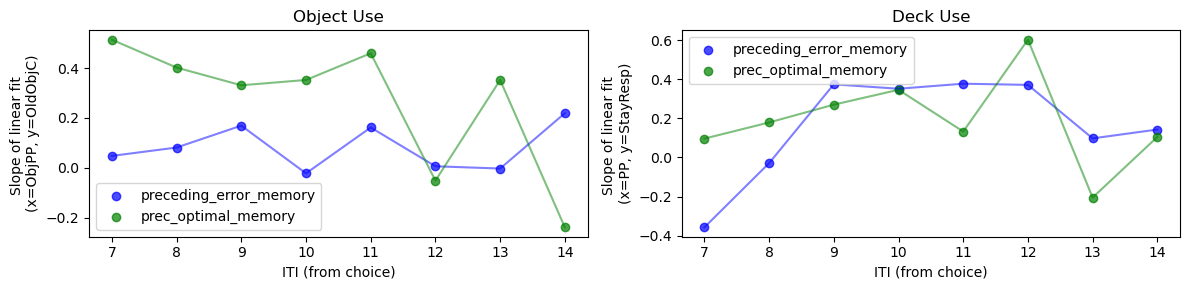

In [8]:
data = pf.add_isi_to_data(data, save=True)
pf.plot_lingering_modes_iti(data, from_choice_or_fb='choice', oldnew_vs_newnew=True)

pf.plot_lingering_modes_iti(data, from_choice_or_fb='choice', oldnew_vs_newnew=False)
# oldnew_vs_newnew = True:compare preceding oldnew-optimal to preceding newnew trials
# oldnew_vs_newnew = True: compare preceding oldnew-optimal to preceding oldnew-nonoptimal trials
# from_choice_or_fb: where to start the ITI count (end of last choice, or last fb)

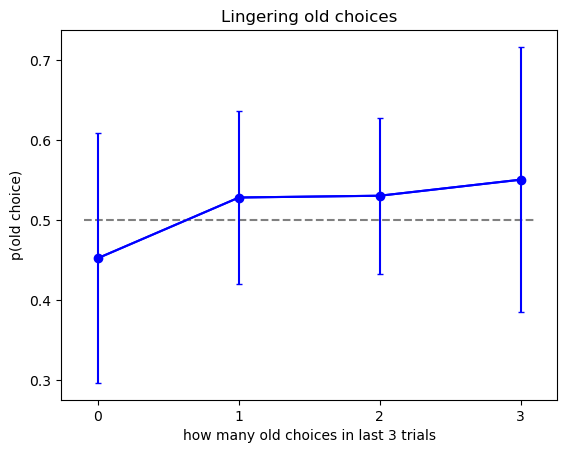

In [33]:
p_old = []
for sub in data.Sub.unique():
    subdata = data[data.Sub == sub]
    sub_old = [0,0,0,0]
    totals = [0,0,0,0]
    for i,row in subdata.iterrows():
        if i > 2:
            if row.OldT==1:
                sum_prev_old = data.OldT.iloc[i-3:i].sum()
                totals[sum_prev_old] += 1
                if row.OldObjC==1:
                    sub_old[sum_prev_old] += 1
    sub_pold = np.array(sub_old) / np.array(totals)
    p_old.append(sub_pold)

p_old = np.array(p_old)

plt.figure()
plt.title('Lingering old choices')
plt.plot(np.mean(p_old, axis=0), color='blue', label='old choice')
plt.plot([-0.1,1,2,3.1],[0.5,0.5,0.5,0.5], color='gray', linestyle='--')
plt.scatter([0,1,2,3], np.mean(p_old, axis=0), color='blue')
plt.errorbar(x = [0,1,2,3], y=np.mean(p_old, axis=0), yerr=np.std(p_old, axis=0), capsize=2, color='blue')
plt.xlabel('how many old choices in last 3 trials')
plt.xticks([0,1,2,3])
plt.ylabel('p(old choice)')
plt.show()

### Understanding the likelihoods

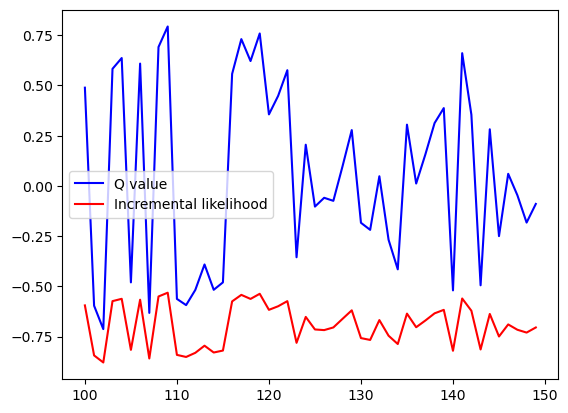

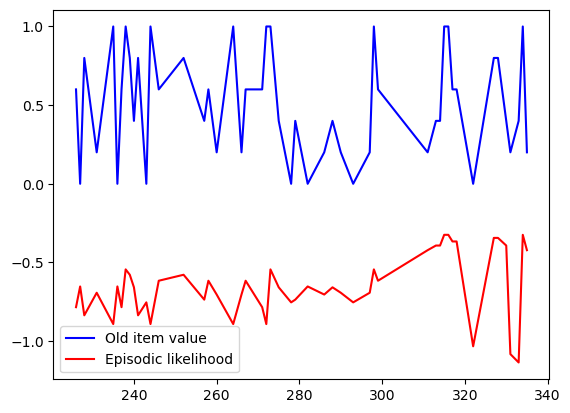

In [40]:
# sanity check -- do Q value (Q_diff) and Inc_lik scale together? 
# do Old value and Ep_lik scale together?
i = 100
j = 50
plt.plot(data.Q_diff[i:i+j], color='blue', label='Q value')
plt.plot(data.Inc_lik[i:i+j], color='red', label='Incremental likelihood')
plt.legend()
plt.show()

plt.plot(data[data.OldT==1].ObjPP[i:i+j], color='blue', label='Old item value')
plt.plot(data[data.OldT==1].Ep_lik[i:i+j], color='red', label='Episodic likelihood')
plt.legend()
plt.show()

Episodic likelihood should account for:
- non-lucky deck choices (excluding trials after a reversal)
    - and especially non-lucky deck choices with Outcome > 0.5
- choice behavior when episodic value contradicts deck value 
    - i.e., should covary with OptObj when ObjDeckMatch==1 (mismatch)
        - when a good old object is in unlucky deck, or a bad old object in lucky deck

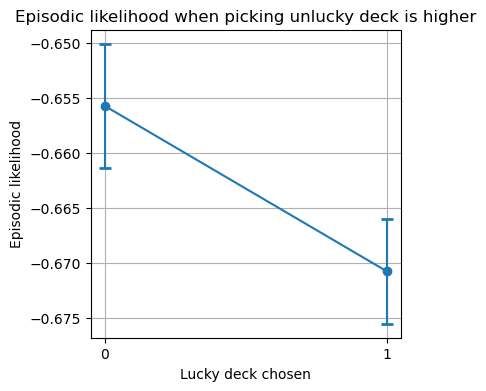

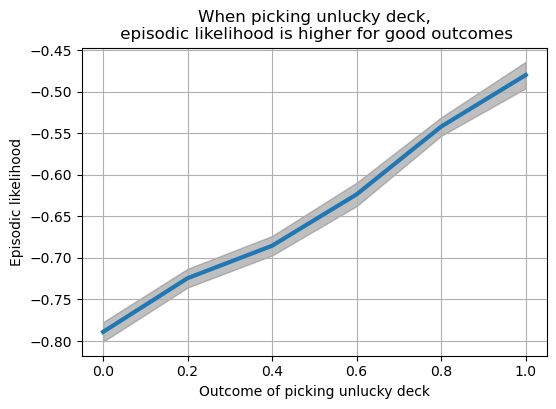

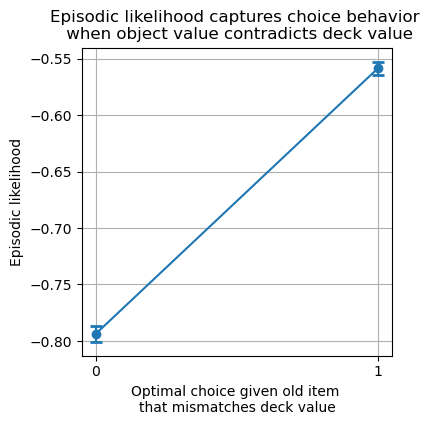

In [144]:
pf.simple_plot_pair(data = data[data.OldT==1], x_var='LuckyDeckC', y_var='Ep_lik', xticks=((0,1)),
                    xlabel='Lucky deck chosen', ylabel='Episodic likelihood',
                    title='Episodic likelihood when picking unlucky deck is higher')

pf.simple_plot(data = data[(data.OldT==1) & (data.LuckyDeckC==0)], x_var='Outcome', y_var='Ep_lik',
                    xlabel='Outcome of picking unlucky deck', ylabel='Episodic likelihood',
                    title='When picking unlucky deck,\n episodic likelihood is higher for good outcomes')

pf.simple_plot_pair(data = data[(data.OldT==1) & (data.ObjDeckMatch==1)], x_var='OptObj', y_var='Ep_lik', xticks=((0,1)),
                    xlabel='Optimal choice given old item \nthat mismatches deck value', ylabel='Episodic likelihood',
                    title='Episodic likelihood captures choice behavior \n when object value contradicts deck value')

In [542]:
# do we have enough mismatch trials to model in fMRI? in one session
test = data[(data.OldT==1) & (data.ObjDeckMatch==1)]
test =test[(test.Sub==2)&(test.Run==1)]
print("Optimal choices on mismatch:", len(test[test.OptObj==0]))
print("Non-optimal choices on mismatch:",len(test[test.OptObj==1]))

Optimal choices on mismatch: 5
Non-optimal choices on mismatch: 6


### RT 

Do episodic likelihood and RT correlate?

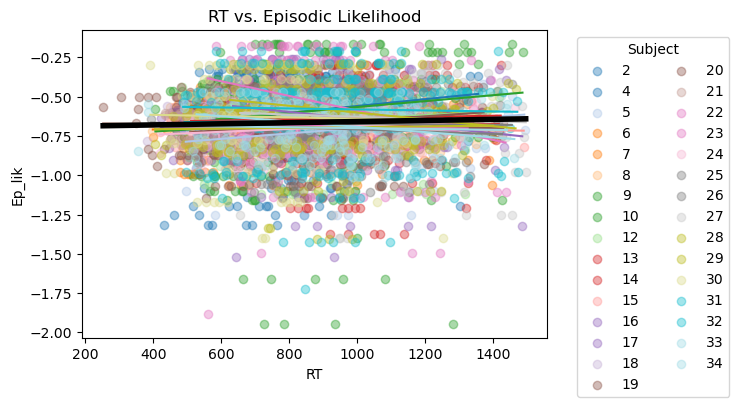

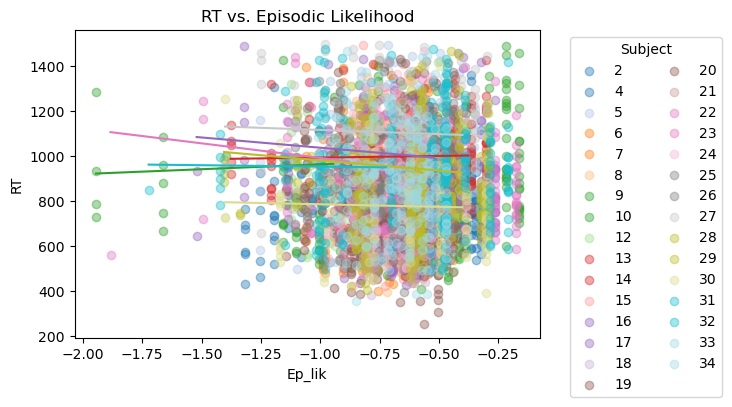

In [38]:
from scipy.stats import linregress
rtdata = data[(~pd.isna(data.RT))&(~pd.isna(data.Ep_lik))]
subjects = rtdata.Sub.unique()
color_dict = {sub: plt.cm.tab20(np.linspace(0, 1, len(subjects))) [i] for i, sub in enumerate(subjects)}
plt.figure(figsize=(6,4))
for sub in subjects:
    sub_data = rtdata[rtdata.Sub == sub]
    plt.scatter(sub_data.RT, sub_data.Ep_lik, color=color_dict[sub], label=sub, alpha=0.4)
    slope, intercept, _,_,_ = linregress(sub_data.RT, sub_data.Ep_lik)
    x = np.arange( min(sub_data.RT), max(sub_data.RT))
    plt.plot(x, x*slope+intercept, color=color_dict[sub])
slope, intercept,_,_,_ = linregress(rtdata.RT, rtdata.Ep_lik)
x = np.arange( min(rtdata.RT), max(rtdata.RT))
plt.plot(x, x*slope+intercept, color='black', linewidth=4)
plt.xlabel("RT")
plt.ylabel("Ep_lik")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)
plt.title('RT vs. Episodic Likelihood')
plt.show()

rtdata = data[(~pd.isna(data.RT))&(~pd.isna(data.Ep_lik))]
subjects = rtdata.Sub.unique()
color_dict = {sub: plt.cm.tab20(np.linspace(0, 1, len(subjects))) [i] for i, sub in enumerate(subjects)}
plt.figure(figsize=(6,4))
for sub in subjects:
    sub_data = rtdata[rtdata.Sub == sub]
    plt.scatter(sub_data.Ep_lik,sub_data.RT, color=color_dict[sub], label=sub, alpha=0.4)
    slope, intercept, _,_,_ = linregress(sub_data.Ep_lik, sub_data.RT)
    x = np.arange( min(sub_data.Ep_lik), max(sub_data.Ep_lik))
    plt.plot(x, x*slope+intercept, color=color_dict[sub])
slope, intercept,_,_,_ = linregress(rtdata.Ep_lik, rtdata.RT)
x = np.arange( min(sub_data.Ep_lik), max(sub_data.Ep_lik))
plt.plot(x, x*slope+intercept, color='black', linewidth=4)
plt.xlabel("Ep_lik")
plt.ylabel("RT")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)
plt.title('RT vs. Episodic Likelihood')
plt.show()

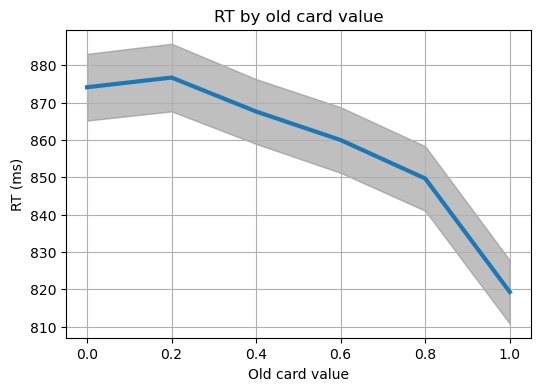

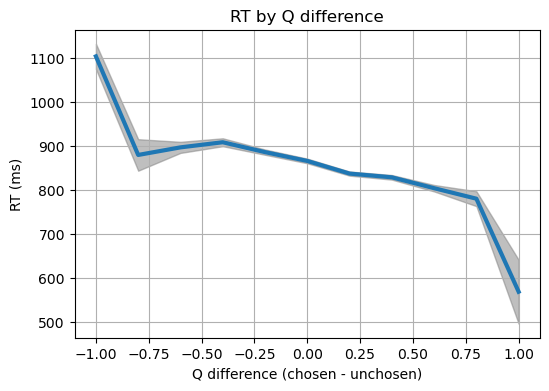

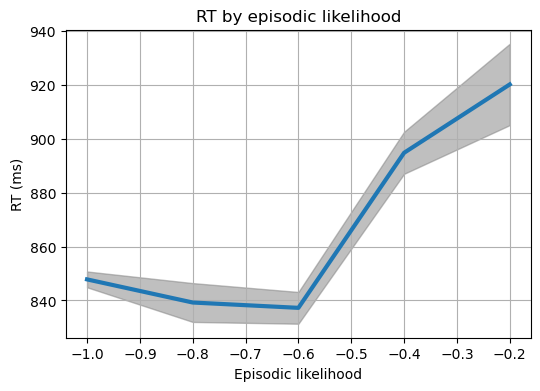

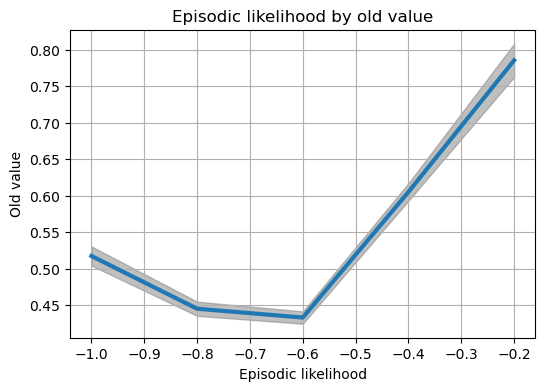

In [41]:
# RT by old value
pf.simple_plot(data=data, x_var='ObjPP', y_var='RT', title='RT by old card value', xlabel='Old card value', ylabel='RT (ms)')

# RT by Q difference
def round_to_nearest_bin(x, bins):
    return bins[np.argmin(np.abs(bins - x))]
data['Q_diff_bin'] = data.Q_diff.apply(lambda x: round_to_nearest_bin(x, bins=np.linspace(-1,1,11)))
pf.simple_plot(data=data, x_var='Q_diff_bin', y_var='RT', title='RT by Q difference', xlabel='Q difference (chosen - unchosen)', ylabel='RT (ms)')

# # RT by ep_lik
# def round_to_nearest_bin(x, bins):
#     return bins[np.argmin(np.abs(bins - x))]
# data['ep_lik_bin'] = data.Ep_lik.apply(lambda x: round_to_nearest_bin(x, bins=np.linspace(-1,1,11)))
# pf.simple_plot(data=data, x_var='ep_lik_bin', y_var='RT', title='RT by episodic likelihood', xlabel='Episodic likelihood', ylabel='RT (ms)')

# pf.simple_plot(data=data, x_var='ep_lik_bin', y_var='ObjPP', title='Episodic likelihood by old value', xlabel='Episodic likelihood', ylabel='Old value')

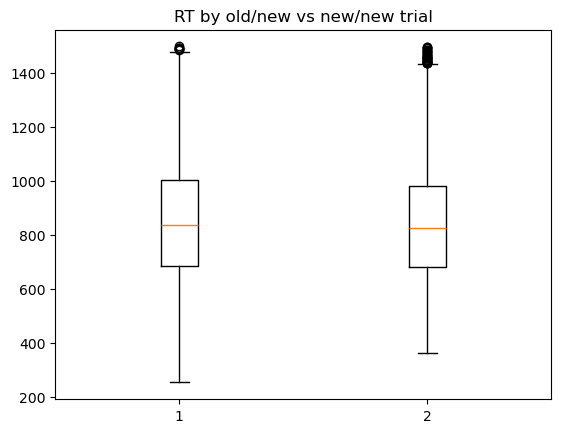

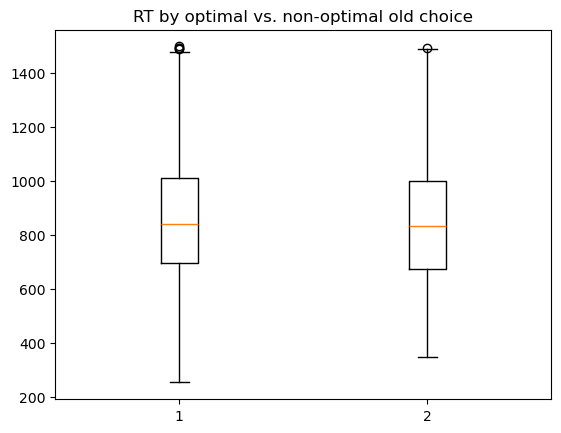

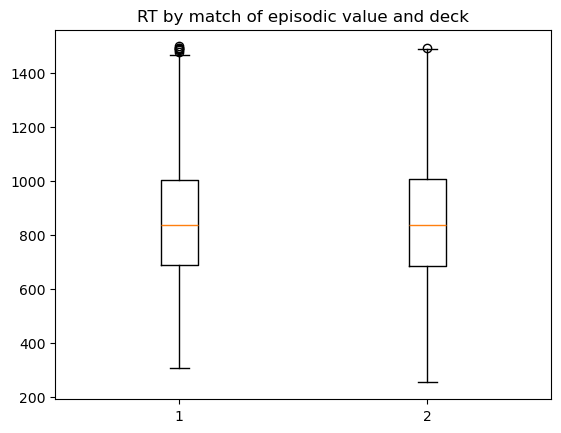

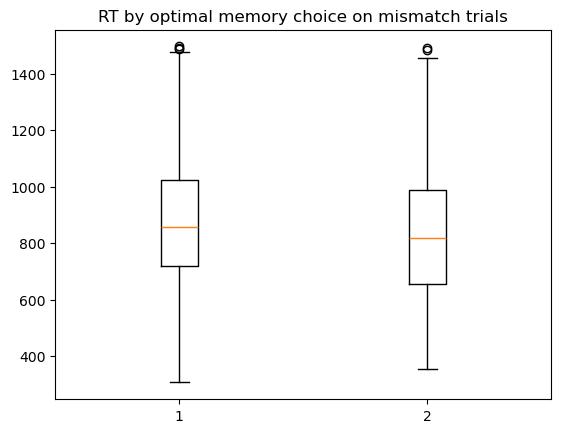

In [32]:
# RT differences between key conditions?
plt.boxplot([ data[(data.OldT==1)&(~pd.isna(data.RT))].RT, data[(data.OldT==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by old/new vs new/new trial')
plt.show()

plt.boxplot([ data[(data.OptObj==1)&(~pd.isna(data.RT))].RT, data[(data.OptObj==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by optimal vs. non-optimal old choice')
plt.show()

plt.boxplot([ data[(data.ObjDeckMatch==1)&(~pd.isna(data.RT))].RT, data[(data.ObjDeckMatch==0)&(~pd.isna(data.RT))].RT ])
plt.title('RT by match of episodic value and deck')
plt.show()

plt.boxplot([ data[(data.OptObj==1)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT, data[(data.OptObj==0)&(~pd.isna(data.RT))&(data.ObjDeckMatch==1)].RT ])
plt.title('RT by optimal memory choice on mismatch trials')
plt.show()

### Miscellaneous

does the old object being in the lucky deck affect its probability of being chosen?


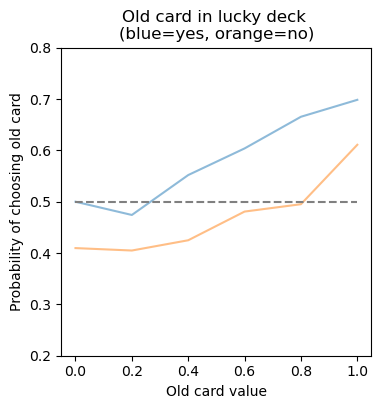

In [147]:
x_var = 'OldObjLuckyDeck' # 0 for YES, 1 for NO
pf.overall_plot(data, x_var='ObjPP',y_var='OldObjC',grouping_var='OldObjLuckyDeck', mean=False,
                    xlabel='Old card value',ylabel='Probability of choosing old card',
                    ylim=(0.2,0.8), chance=0.5, title='Old card in lucky deck \n(blue=yes, orange=no)')

previous payment from the deck that the old card appears in

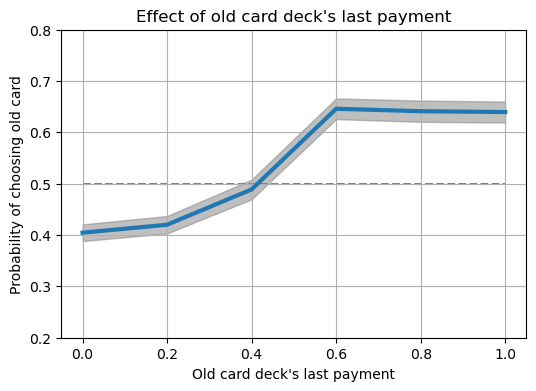

In [42]:
pf.simple_plot(data, x_var='OldDeckPP',y_var='OldObjC',xlabel='Old card deck\'s last payment',
                ylabel='Probability of choosing old card',
               ylim=(0.2,0.8), chance=0.5, title='Effect of old card deck\'s last payment')

# Issues

In [ ]:
# code to delete first level folders
import os, shutil
def remove_directory(path):
    if os.path.isdir(path):
        shutil.rmtree(path)
        if os.path.isdir(path):
            os.rmdir(path)

root = '/Volumes/shohamy-locker/chris/hybrid_mri_CSI'
for sub in [i for i in os.listdir(root) if 'TCST' in i]:
    subdir = os.path.join(root,sub)
    for run in os.listdir(subdir):
        rundir = os.path.join(subdir,run)

        remove_directory(os.path.join(rundir,'csi_model1.feat'))
        remove_directory(os.path.join(rundir,'csi_model1+.feat'))

TRIAL TIMING
The naming of the timing data in the matlab outputs is a bit misleading, and led to the Choice EVs being constructed wrong.
- startTrial is actually the start of the jittered ITI
- startChoice is the stimulus onset, not the time of choice
- startDelay is the time of the response, then lasting 3s until FB (or, on no-response trials, lasting 0s). This is when the box is shown around the chosen card.
- startFB is the feedback phase, always ~1.5s
- startISI is just a fraction of a second before the next startTrial, but is technically the start of the jittered ITI.

in `make_EV.m`, the stimulus onset times were taken as 'startTrial' and the response times as 'startChoice', when in reality the stimulus onset times are startChoice and the response time is startDelay.

So, we had to re-create the choice EVs.

In [179]:
# load matlab outputs
subdir = '02_output'
# sub = subdir[0:2]
subdirpath = os.path.join(SERVER_PATH, 'behavior', subdir)
run = '1'

matfile = scipy.io.loadmat(subdirpath + f'/Performance_{run}.mat') # these files actually contain all data from this run and preceding, so we have to filter
run_mask = matfile['Performance']['cond'][0,0]['Run'][0,0][0].astype(str) == run # current run
valid_mask = ~np.isnan( matfile['Performance']['choose'][0, 0]['resp'][0,0][0] ) # non-nan responses

actual_rts = matfile['Performance']['choose'][0,0]['RT'][0,0][0][run_mask] / 1000 # ms to s
startChoice = matfile['Performance']['time'][0,0]['startChoice'][0,0][0][run_mask] # time of RT
startDelay = matfile['Performance']['time'][0,0]['startDelay'][0,0][0][run_mask] # time of RT
startISI = matfile['Performance']['time'][0,0]['startISI'][0,0][0][run_mask]
startTrial = matfile['Performance']['time'][0,0]['startTrial'][0,0][0][run_mask]
startFB= matfile['Performance']['time'][0,0]['startFB'][0,0][0][run_mask]

print('startTrial to startChoice: ', (startChoice-startTrial)[0:6])
print('startChoice to startDelay: ', (startDelay-startChoice)[0:6])
print('RT (should match above): ', actual_rts[0:6])
print('startDelay to startFB: ', (startFB-startDelay)[0:6])
print('startFB to startISI: ', (startISI-startFB)[0:6])

startTrial to startChoice:  [1.87785247 4.26363835 2.43419048 3.74383787 3.15629206 2.6019752 ]
startChoice to startDelay:  [0.68817    0.77233337 0.47027753 0.82252273 0.60429546 0.70516846]
RT (should match above):  [0.68299483 0.7522088  0.45936071 0.81789436 0.60051739 0.69173266]
startDelay to startFB:  [3.00542954 3.00515326 3.00529576 3.00553087 3.00529617 3.00544316]
startFB to startISI:  [1.51105874 1.51121397 1.51095217 1.51106817 1.51122888 1.51106905]


In [176]:
# is there a consistent latency between the expected event time and the actual?
# No. Feedback was ~0.011s longer than expected, delay was 0.005s longer than expected

fb_start_times = matfile['Performance']['time'][0,0]['startFB'][0,0][0][run_mask]
fb_end_times = matfile['Performance']['time'][0,0]['startISI'][0,0][0][run_mask]
delay_start = matfile['Performance']['time'][0,0]['startDelay'][0,0][0][run_mask]
fb_durations = fb_end_times -  fb_start_times
delay_durations = fb_start_times-delay_start

print('Feedback supposed to be 1.5s, actually this much longer: \n', fb_durations - 1.5)
print('\nDelay supposed to be 3s, actually this much longer:\n', delay_durations -3)


Feedback supposed to be 1.5s, actually this much longer: 
 [0.01105874 0.01121397 0.01095217 0.01106817 0.01122888 0.01106905
 0.01104059 0.01091926 0.01106467 0.01091439 0.01107652 0.01117688
 0.01102164 0.01094096 0.01086412 0.0111901  0.01104388 0.01104158
 0.0111588  0.01104518 0.01102447 0.01106016 0.01118266 0.0107865
 0.01106696 0.01092181 0.01101263 0.01122223 0.01118689 0.0111139
 0.01087194 0.01101151 0.01093037 0.01106537 0.01093607 0.0110397
 0.01109426 0.01104871 0.01122648 0.01109494 0.01120172 0.01105079
 0.01094379 0.01120187 0.01105624 0.01107762 0.01119361 0.01094083
 0.01104829 0.01105189 0.01124198 0.01107994 0.01111225 0.01119772
 0.01102791 0.01117684 0.01106646 0.01102856 0.01106728 0.01105534]

Delay supposed to be 3s, actually this much longer:
 [ 0.00542954  0.00515326  0.00529576  0.00553087  0.00529617  0.00544316
  0.00545512  0.00544907  0.0053172   0.00531654  0.00517929  0.00534369
  0.00535903  0.00544458  0.00536926  0.00519608  0.0052977   0.005341
  

In [ ]:
# there are 59 trials with episodic likelihood but its not an old trial?
# all subject 13
data[data.Ep_lik.notna() & (data.OldT==0)]

,Sub,Run,Trial,OldT,Delay,LuckyDeck,ObjPP,OldObjLuckyDeck,ObjDeckMatch,Outcome,...,Lik_rat,Ep_lik_enc,Ep_lik_norm_enc,encT,Lik_rat_norm,iti_fromfb,iti_fromchoice,encTrialNum,Q_diff_bin,ep_lik_bin
2759,13,2,61,0,NaN,2,NaN,NaN,NaN,1.0,...,-0.363674,NaN,NaN,1,-0.869597,NaN,NaN,NaN,-0.2,-0.6
2761,13,2,63,0,NaN,2,NaN,NaN,NaN,0.8,...,0.090442,-0.663095,-0.091720,1,0.368008,5.473355,10.997002,NaN,0.0,-0.6
2763,13,2,65,0,NaN,2,NaN,NaN,NaN,0.4,...,-0.631556,NaN,NaN,1,-1.599660,6.497422,11.752673,NaN,-0.2,-0.4
2768,13,2,70,0,NaN,2,NaN,NaN,NaN,1.0,...,0.204969,NaN,NaN,1,0.680130,5.674969,10.997250,NaN,0.4,-0.6
2770,13,2,72,0,NaN,2,NaN,NaN,NaN,0.2,...,-0.576420,NaN,NaN,1,-1.449397,5.960288,11.500839,NaN,-0.2,-0.4
2774,13,2,76,0,NaN,1,NaN,NaN,NaN,0.2,...,0.018955,-0.363486,0.924721,1,0.173183,6.329805,11.752595,NaN,-0.2,-0.6
2780,13,2,82,0,NaN,1,NaN,NaN,NaN,0.6,...,0.051093,NaN,NaN,1,0.260770,4.130199,9.754761,NaN,-0.2,-0.6
2784,13,2,86,0,NaN,1,NaN,NaN,NaN,0.2,...,0.562907,-0.525499,0.375083,1,1.655621,3.156467,8.495373,NaN,-0.4,-1.0
2787,13,2,89,0,NaN,1,NaN,NaN,NaN,0.4,...,-0.431383,-0.525499,0.375083,1,-1.054126,5.406240,10.997152,NaN,0.2,-0.4
2790,13,2,92,0,NaN,2,NaN,NaN,NaN,1.0,...,0.316423,-1.048305,-1.398569,1,0.983876,1.930641,7.756618,NaN,-0.2,-1.0
